In [ ]:
# default_exp core.transitions

# Transitions

> Describe transitions between states

## Overview

A transition is a nonrecurrent bi-gram, which means each transition in a sequence represents a change between states (as opposed to staying in the same state). Transitions are an important part of sequence analysis, and the transition matrix generated by the `get_transition_matrix` method is used in many other parts of the library.

In [ ]:
#export
def get_transitions(sequence):
    "Extracts a list of transitions from a sequence, returning a list of lists containing each transition."

    transitions = []
    for position in range(len(sequence) - 1):
        if sequence[position] != sequence[position + 1]:
            transitions.append([sequence[position], sequence[position + 1]])

    return transitions

In [ ]:
#export
def get_ntransitions(sequence):
    "Computes the number of transitions in a sequence."	
    return len(get_transitions(sequence))

In [ ]:
#export
from pysan.core.elements import get_alphabet
from pysan.core.ngrams import get_all_ngrams
import numpy as np, pandas as pd
def get_transition_matrix(sequence, alphabet=None, verbose=False):
    "Computes a transition matrix for each bigram in a sequence. The resulting matrix can be interpreted by reading along the side first, then across the top, indicating from the element down the side, to the element along the top. For example, to find the number of transitions from element 2 to element 3, find element 2 down the side, then follow that row across until it reaches element 3 across the top."
    if alphabet == None:
        alphabet = get_alphabet(sequence)
    all_ngrams = get_all_ngrams(sequence, 2)

    transition_matrix = np.zeros((len(alphabet), len(alphabet)))
    descriptive_matrix = [['-' for x in range(len(alphabet))] for y in range(len(alphabet))]

    for x, element_row in enumerate(alphabet):
        for y, element_column in enumerate(alphabet):
            current_ngram = [element_row, element_column]
            descriptive_matrix[x][y] = 'n' + str(current_ngram)
            #print('from', current_ngram[0], 'to', current_ngram[1], ':', all_ngrams.count(current_ngram))
            transition_matrix[x, y] = all_ngrams.count(current_ngram)

    # add column & index labelling in TraMineR style
    pre_alphabet = [str(a) + '->' for a in alphabet]
    post_alphabet = ['->' + str(a) for a in alphabet]

    if verbose:
        de_df = pd.DataFrame(descriptive_matrix, columns=post_alphabet, index=pre_alphabet)
        print(de_df)
    tm_df = pd.DataFrame(transition_matrix, columns=post_alphabet, index=pre_alphabet)
    return tm_df

In [ ]:
sequence = [1,1,2,1,2,2,3,1,1,2,2,1,2,2,3,1,1,2]
get_transition_matrix(sequence)

,->1,->2,->3
1->,3.0,5.0,0.0
2->,2.0,3.0,2.0
3->,2.0,0.0,0.0


## Plotting

As with other plotting methods in the pysan library, the methods below can each be called on a single sequence and will return a matplotlib pylot object which can be modified as needed.

In [ ]:
#export
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import copy

def plot_transition_matrix(sequence, cmap='summer'):
    "Computes and plots a transition matrix, returning a colored matrix with elements at position n up the y axis, and elements at position n+1 along the x axis."

    matrix = get_transition_matrix(sequence)

    results_size = len(matrix.columns)
    values = np.empty((results_size, results_size), dtype=object)
    
    for r, row in enumerate(matrix.values):
        for e, element in enumerate(row):
            if element == "-":
                values[r, e] = 100
                continue
            if element == "":
                values[r, e] = np.nan
                continue
            if "*" in str(element):
                value = element.replace("*", "")
                values[r, e] = float(value)
            else:
                values[r, e] = element

    current_cmap = copy.copy(cm.get_cmap(cmap))
    current_cmap.set_bad(color="white")

    plt.figure()

    # this one-lines sets the x axis to appear at the top of this plot only
    with plt.rc_context({'xtick.bottom':False, 'xtick.labelbottom':False, 'xtick.top':True, 'xtick.labeltop':True}):
        ax = plt.gca()
        ax.xaxis.set_label_position('top')
        plt.imshow(np.array(values).astype(np.float), cmap=current_cmap)

        plt.yticks(range(len(matrix.index)), list(matrix.index))
        plt.xticks(range(len(matrix.columns)), list(matrix.columns))
        cbar = plt.colorbar()
        #cbar.set_ticks([-100, -80, -60, -40, -20, 0, 20, 40, 60, 80, 100])
        #cbar.set_ticklabels([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.grid(False)
        return plt

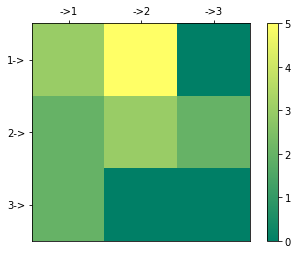

In [ ]:
plt = plot_transition_matrix(sequence)
plt.show()